# Virtual Pets
**Jin Yeom**  
jin.yeom@hudl.com

In this notebook, we create a prototype for a virtual pet game, similar to existing virtual pet toys like [Digimon](https://en.wikipedia.org/wiki/Digimon) and [Tamagochi](https://en.wikipedia.org/wiki/Tamagotchi). This project is also inspired by [this tweet](https://twitter.com/lexaloffle/status/1129071867610853376). Most importantly, however, we aim to create such a game that is a bit more intelligent, by applying more advanced techniques for generating sprites and their behaviours.

## Motivation

A "tweetcart" for Pico-8 by @lexaloffle:

```lua
function rnd_spr(r,x,y)
srand(r)pal(1,13)pal(2,7)
for v=0,7 do for u=0,3 do
c=rnd(3) pset(x+u,y+v,c) pset(x+7-u,y+v,c)
end end end

cls()p=0::_::
for y=0,11 do for x=0,11 do
rnd_spr(p*144+x+y*12,4+x*10,4+y*10)
end end if(btnp(5))p+=1 goto _
```

<img src="images/example.png" align=left width=30%></img>

Let's start by taking a better look at the random sprite generation algorithm in the tweet:

```lua
function rnd_spr(r,x,y)
    -- Seed the random number generator.
    srand(r)
    
    -- `pal` seems to be specific to Pico-8.
    --
    -- According to https://pico-8.fandom.com/wiki/Pal:
    --   "Changes the draw state so all instances of a 
    --   given color are replaced with a new color."
    pal(1,13)
    pal(2,7) 
    
    for v=0,7 do 
        for u=0,3 do
            -- Simply assigning random colors,
            -- but with vertical symmetry.
            c=rnd(3) 
            pset(x+u,y+v,c) 
            pset(x+7-u,y+v,c)
        end 
    end 
end

cls()
p = 0
::_::
for y=0,11 do 
    for x=0,11 do
        rnd_spr(p*144+x+y*12,4+x*10,4+y*10)
    end
end

-- When button "5" is pressed, increment `p` by 1 and
-- iterate from `_` again.
--
-- Since this seems irrelevant for us, we'll ignore it.
if(btnp(5)) 
    p+=1
    goto _
```

In [4]:
from enum import Enum

In [25]:
import numpy as np
from matplotlib import pyplot as plt

Let's try reimplementing the algorithm above in Python!

In [6]:
class Color(Enum):
    WHITE = (255, 255, 255)
    GREY = (128, 128, 128)
    BLACK = (0, 0, 0)
    
    @classmethod
    def rand(cls, rng=None):
        options = ['WHITE', 'GREY', 'BLACK']
        if rng is None:
            return cls[np.random.choice(options)]
        return cls[rng.choice(options)]

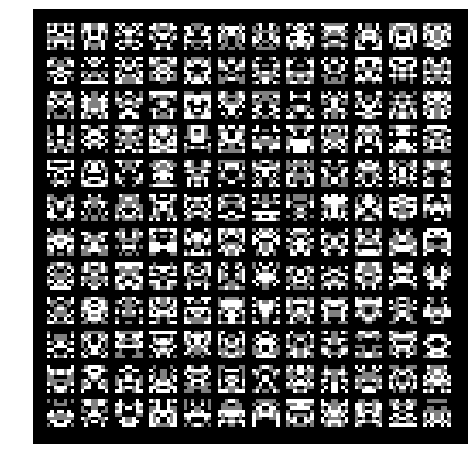

In [119]:
def rnd_spr(s, r, x, y):
    rng = np.random.RandomState(r)
    for v in range(8):
        for u in range(4):
            c = Color.rand(rng)
            s[y+v, x+u, :] = c.value
            s[y+v, x+7-u, :] = c.value

plt.figure(figsize=(8, 8))
plt.axis('off')
s = np.zeros((127, 127, 3), dtype=np.uint8)
for y in range(12):
    for x in range(12):
        rnd_spr(s,x+y*12,4+x*10,4+y*10)
plt.imshow(s)
plt.show()

Once again, I'd like to mention how uncanny it is that these look like they can be some creatures, just because they're symmetrical.

In [130]:
def rnd_spr(r=None, s=10):
    rng = np.random.RandomState(r)
    spr = np.zeros((s, s, 3), np.uint8)
    for v in range(s-2):
        for u in range((s-2)//2):
            c = Color.rand(rng)
            spr[v+1, u+1, :] = c.value
            spr[v+1, s-2-u, :] = c.value
    return spr

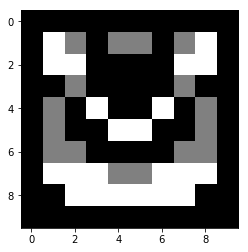

In [136]:
spr = rnd_spr()
plt.imshow(spr)
plt.show()

Now, I'm almost embarrassed by how amazed I was with this, while at the same time still intrigues with its simplicity. This is still a good enough inspiration. We may ask here, what if we can use random CPPNs to create such sprites that can also be parameterized? This would be interesting, since a complexifying CPPN can simulate the creature's physical development.

## Compositional Pattern Producing Networks

In [ ]:
# TODO: implement CPPN